In [133]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import plotly.express as px

In [1]:
data=pd.read_csv("dirty_cafe_sales.csv")
df=data.copy()
df.head()

NameError: name 'pd' is not defined

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


In [136]:
df.duplicated().sum()

np.int64(0)

In [137]:
df.replace(["ERROR","UNKNOWN"],np.nan,inplace=True)

In [138]:
df["Quantity"]=df["Quantity"].astype("float64")
df["Price Per Unit"]=df["Price Per Unit"].astype("float64")
df["Total Spent"]=df["Total Spent"].astype("float64")

In [139]:
df.dropna(subset=["Item","Quantity","Price Per Unit","Total Spent","Transaction Date"],inplace=True)

In [140]:
df["Location"]=df["Location"].replace(" NaN",np.nan)

In [141]:
df["Location"].replace(np.nan,"ee",inplace=True)
df["Payment Method"].replace(np.nan,"ee",inplace=True)

C:\Users\dell\AppData\Local\Temp\ipykernel_4536\144675373.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\dell\AppData\Local\Temp\ipykernel_4536\144675373.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [142]:
df = df[df["Location"] != "ee"]
df = df[df["Payment Method"] != "ee"]

In [143]:
df.isnull().mean()*100

Transaction ID      0.0
Item                0.0
Quantity            0.0
Price Per Unit      0.0
Total Spent         0.0
Payment Method      0.0
Location            0.0
Transaction Date    0.0
dtype: float64

In [144]:
df["Payment Method"].replace("NaN", np.nan, inplace=True)


C:\Users\dell\AppData\Local\Temp\ipykernel_4536\1015539783.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [145]:
df["Transaction Date"]=pd.to_datetime(df["Transaction Date"])

In [146]:
ee=df["Item"].value_counts()

In [147]:

px.pie(data_frame=ee,names=df["Item"],)

In [148]:
df.groupby("Item")["Quantity"].sum()

Item
Cake        1173.0
Coffee      1121.0
Cookie      1163.0
Juice       1245.0
Salad       1272.0
Sandwich    1193.0
Smoothie    1022.0
Tea         1151.0
Name: Quantity, dtype: float64

In [149]:
px.line(df.groupby("Item")["Quantity"].sum())

In [150]:
df.groupby(df["Item"])["Total Spent"].sum().astype(int).sort_values(ascending=False)

Item
Salad       6360
Sandwich    4772
Smoothie    4088
Juice       3735
Cake        3519
Coffee      2242
Tea         1726
Cookie      1163
Name: Total Spent, dtype: int64

In [151]:
px.bar(df.groupby(df["Item"])["Total Spent"].sum().astype(int).sort_values(ascending=False))

In [152]:
aa=df["Payment Method"].value_counts()

In [153]:
px.pie(data_frame=aa,names=df["Payment Method"], color_discrete_sequence=["purple"])

In [154]:
df["Transaction Date"]=df["Transaction Date"].dt.to_period("M")


In [155]:
df["Transaction Date"]=df["Transaction Date"].dt.to_timestamp()

In [156]:
ss=df.groupby(df["Transaction Date"])["Total Spent"].sum().astype(int)
ss

Transaction Date
2023-01-01    2749
2023-02-01    2219
2023-03-01    2240
2023-04-01    2275
2023-05-01    1844
2023-06-01    2281
2023-07-01    2307
2023-08-01    2328
2023-09-01    2426
2023-10-01    2309
2023-11-01    2397
2023-12-01    2227
Name: Total Spent, dtype: int64

In [157]:
px.line(data_frame=ss, color_discrete_sequence=["blue"],markers=True)

In [161]:
corr=df.corr(numeric_only=True)

<Axes: >

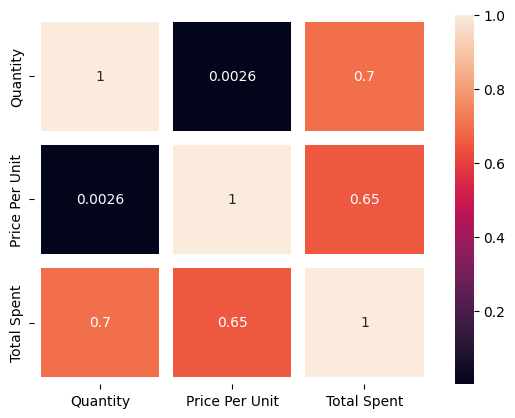

In [162]:
sns.heatmap(corr,linewidths=10,annot=True)